# Markov Chain
 
Sungchul Lee  

[Install RISE for an interactive view](https://github.com/damianavila/RISE)

In [5]:
import numpy as np

# State



In [6]:
states = [0,1,2,3]
N_STATES = len(states)

# Transition probability



In [8]:
# transition probabilities
P = np.empty((N_STATES, N_STATES))
l = 0.3
r = 0.3
s = 1-l-r

#             0   1   2   3   
P[ 0, :] = [s+l,  r,  0,  0]
P[ 1, :] = [  l,  s,  r,  0]
P[ 2, :] = [  0,  l,  s,  r]
P[ 3, :] = [  0,  0,  l,s+r]

print(P)

[[0.7 0.3 0.  0. ]
 [0.3 0.4 0.3 0. ]
 [0.  0.3 0.4 0.3]
 [0.  0.  0.3 0.7]]


# Generate random samples from discrete distribution - np.random.choice

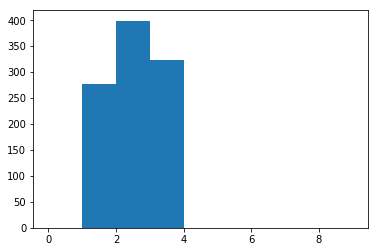

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(337)

x        = [  0,   1,   2,   3]
pmf      = [  0, 0.3, 0.4, 0.3]
x_sample = np.random.choice(x, p=pmf, size=(1000,)) 

plt.hist(x_sample, bins=np.arange(10))
plt.show()

# Simulation of Markov Chain 

state:  3, next_state:  3, transition_prob: 0.7
state:  3, next_state:  3, transition_prob: 0.7
state:  3, next_state:  3, transition_prob: 0.7
state:  3, next_state:  2, transition_prob: 0.3
state:  2, next_state:  2, transition_prob: 0.39999999999999997
state:  2, next_state:  2, transition_prob: 0.39999999999999997
state:  2, next_state:  3, transition_prob: 0.3
state:  3, next_state:  3, transition_prob: 0.7
state:  3, next_state:  2, transition_prob: 0.3
state:  2, next_state:  2, transition_prob: 0.39999999999999997
state:  2, next_state:  3, transition_prob: 0.3
state:  3, next_state:  3, transition_prob: 0.7
state:  3, next_state:  2, transition_prob: 0.3
state:  2, next_state:  3, transition_prob: 0.3
state:  3, next_state:  3, transition_prob: 0.7
state:  3, next_state:  2, transition_prob: 0.3
state:  2, next_state:  2, transition_prob: 0.39999999999999997
state:  2, next_state:  2, transition_prob: 0.39999999999999997
state:  2, next_state:  1, transition_prob: 0.3
state:  

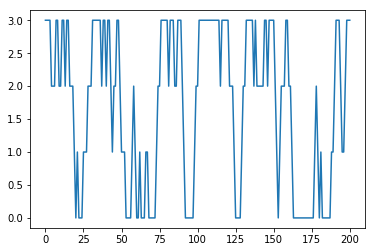

In [11]:
# Simulation of Markov Chain 

# import libraries
import numpy as np
import matplotlib.pyplot as plt

# set parameters ###############################################################
num_steps = 200
# set parameters ###############################################################

# state
states = [0, 1, 2, 3]
N_STATES = len(states)

# transition probabilities
P = np.empty((N_STATES, N_STATES))
l = 0.3
r = 0.3
s = 1-l-r

#             0   1   2   3   
P[ 0, :] = [s+l,  r,  0,  0]
P[ 1, :] = [  l,  s,  r,  0]
P[ 2, :] = [  0,  l,  s,  r]
P[ 3, :] = [  0,  0,  l,s+r]

# MC simulation
msg = "state: {:2}, next_state: {:2}, transition_prob: {}" 

state_history = []

# choose initial state randomly
state = np.random.choice(states) 
state_history.append(state)

for _ in range(num_steps):
    
    # choose next_state using transition probability
    next_state = np.random.choice(states, p=P[state, :])
        
    # probaility of choosing next_state using transition probability
    prob = P[state, next_state]
        
    # print MC action
    msg_print = msg.format(state, next_state, prob)
    print(msg_print)

    # continue MC
    state = next_state
    state_history.append(state)
    
plt.plot(state_history)
plt.show()

# Estimation of Stationary Distribution

##### Stationary Distribution $\pi$

$$
\pi {\bf P} = \pi
$$
$$$$
$$
\left[\begin{array}{ccccc}\pi[0]&\pi[1]&\pi[2]&\pi[3]\end{array}\right]
\left[\begin{array}{ccccc}
{\bf P}[0,0]&{\bf P}[0,1]&{\bf P}[0,2]&{\bf P}[0,3]\\
{\bf P}[1,0]&{\bf P}[1,1]&{\bf P}[1,2]&{\bf P}[1,3]\\
{\bf P}[2,0]&{\bf P}[2,1]&{\bf P}[2,2]&{\bf P}[2,3]\\
{\bf P}[3,0]&{\bf P}[3,1]&{\bf P}[3,2]&{\bf P}[3,3]
\end{array}\right]
=
\left[\begin{array}{ccccc}\pi[0]&\pi[1]&\pi[2]&\pi[3]\end{array}\right]
$$

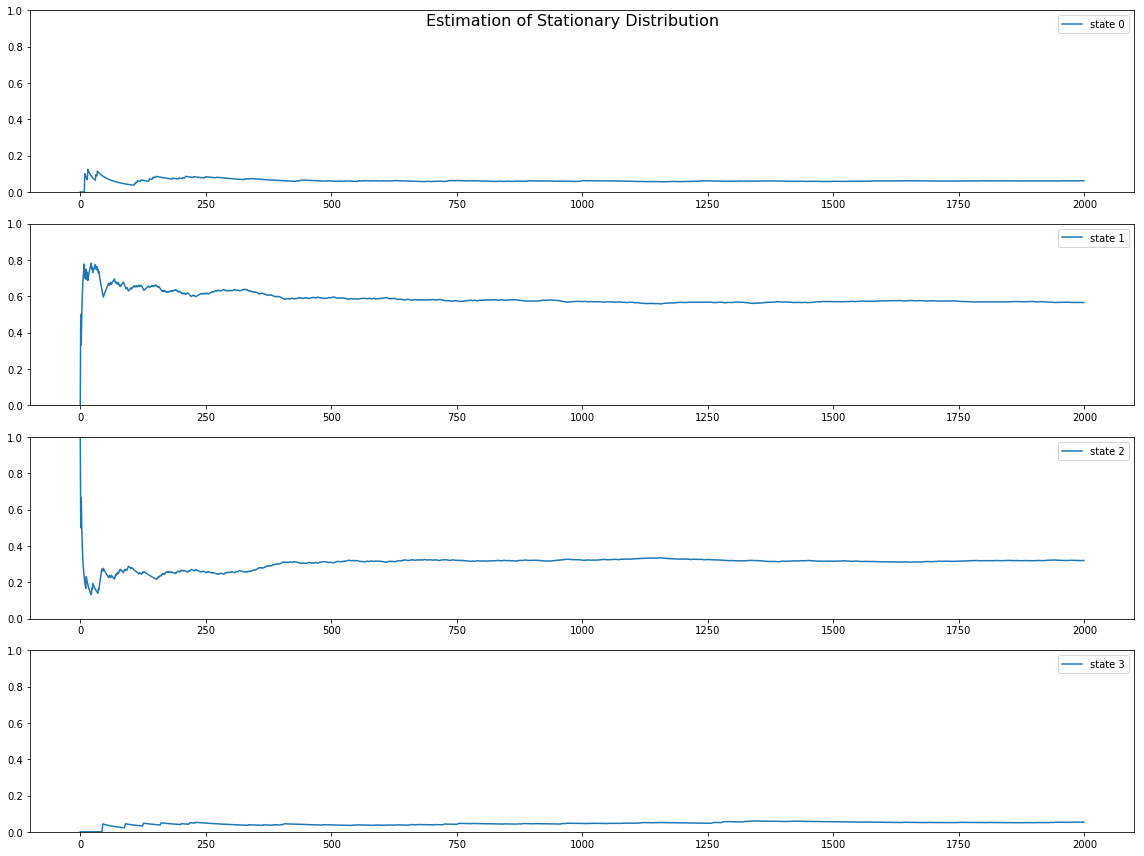

[0.0615 0.566  0.3195 0.053 ]


In [12]:
# Simulation of Markov Chain 

# import libraries
import numpy as np
import matplotlib.pyplot as plt

# set parameters ###############################################################
num_steps = 2000
# set parameters ###############################################################

# state
states = [0, 1, 2, 3]
N_STATES = len(states)

# transition probabilities
# transition probabilities
P = np.empty((N_STATES, N_STATES))

if 0:
    l = 0.1
    r = 0.1
    s = 1-l-r

    #             0   1   2   3   
    P[ 0, :] = [s+l,  r,  0,  0]
    P[ 1, :] = [  l,  s,  r,  0]
    P[ 2, :] = [  0,  l,  s,  r]
    P[ 3, :] = [  0,  0,  l,s+r]
elif 1:
    #             0   1   2   3   
    P[ 0, :] = [0.1,0.9,  0,  0]
    P[ 1, :] = [0.1,0.6,0.3,  0]
    P[ 2, :] = [  0,0.5,0.4,0.1]
    P[ 3, :] = [  0,  0,0.7,0.3]
elif 1:
    np.random.seed(3)
    P = np.random.normal(0., 1., (N_STATES, N_STATES))
    P = np.exp(P)
    P = P / np.sum(P, axis=1).reshape((N_STATES, 1))

# MC simulation
visit_log = np.zeros((N_STATES,num_steps)) 

# choose initial state randomly, not from 3 or 6
state = np.random.choice(states)
    
for step in range(num_steps):
    
    # update visit_log that we are visiting state at step
    visit_log[state,step] = 1.

    # choose next_state using transition probability
    next_state = np.random.choice(states, p=P[state, :])

    # continue MC
    state = next_state

pi = np.cumsum(visit_log, axis=1) / (np.arange(num_steps) + 1).reshape((1,-1)) 

fig = plt.figure(figsize=(16, 12))

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
fig.subplots_adjust(hspace=0.1, wspace=0.3)

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.suptitle.html
fig.suptitle("Estimation of Stationary Distribution", fontsize=16)

for s in range(N_STATES):
    ax = fig.add_subplot(N_STATES, 1, s + 1)
    ax.plot(pi[s], label="state {}".format(str(s)))
    ax.legend(loc='upper right')
    ax.set_ylim([0., 1.])
    
plt.tight_layout()
plt.show()

print(pi[:,-1])